In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


1 Загрузите файл HR.csv в pandas dataframe

In [40]:
url='https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2 Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

In [41]:
# Рассчет основных статистик
statistics = df.describe()

# Рассчет моды для каждой переменной
modes = df.mode().iloc[0]

# Добавление моды к результатам
statistics.loc['mode'] = modes

# Рассчет среднего отклонения
std_dev = df.std()
statistics.loc['std'] = std_dev

print(statistics)

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   
mode             0.100000         0.550000        4.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000

<ipython-input-41-362e373c09d9>:11: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_dev = df.std()


3 Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.

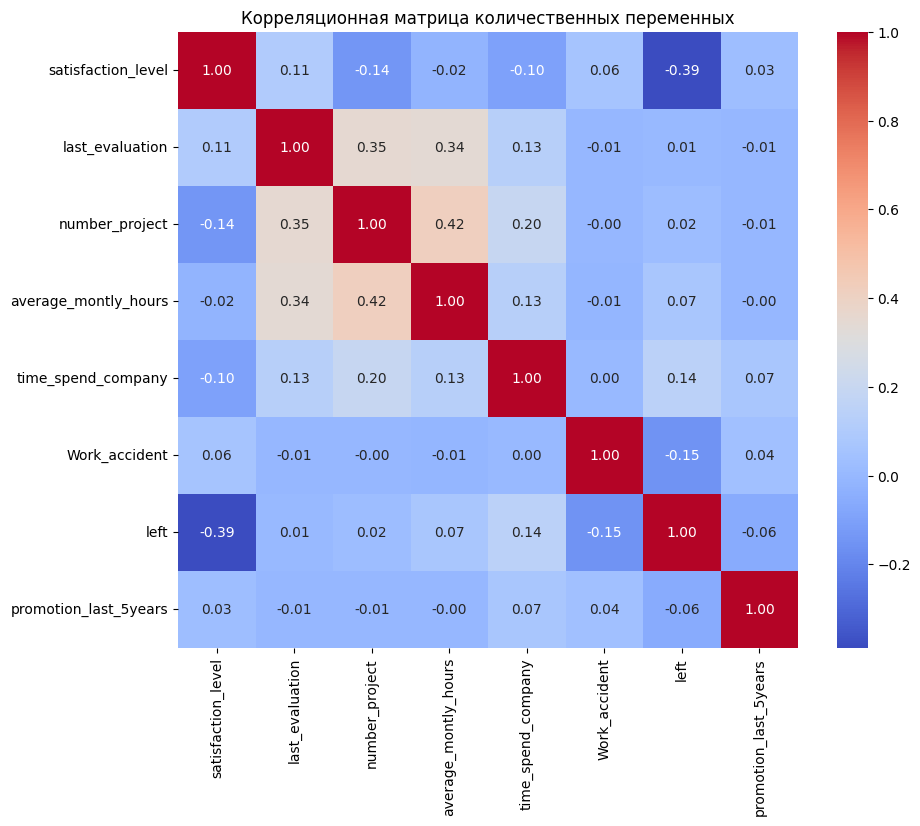

Две самые скоррелированные переменные:
satisfaction_level  satisfaction_level      1.000000
number_project      average_montly_hours    0.417211
dtype: float64

Две наименее скоррелированные переменные:
left  satisfaction_level   -0.388375
      Work_accident        -0.154622
dtype: float64


In [42]:
# Выберем только количественные переменные
numeric_variables = df.select_dtypes(include=['float64', 'int64'])

# Рассчет корреляционной матрицы
correlation_matrix = numeric_variables.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица количественных переменных')
plt.show()

# Определение двух самых скоррелированных и двух наименее скоррелированных переменных
max_corr = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
min_corr = correlation_matrix.unstack().sort_values().drop_duplicates()

print("Две самые скоррелированные переменные:")
print(max_corr.head(2))
print("\nДве наименее скоррелированные переменные:")
print(min_corr.head(2))

4 Рассчитайте сколько сотрудников работает в каждом
департаменте.

In [43]:
employees_per_department = df['department'].value_counts()

print("Количество сотрудников в каждом департаменте:")
print(employees_per_department)

Количество сотрудников в каждом департаменте:
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


5 Показать распределение сотрудников по зарплатам.

<ipython-input-44-cf42a0ebe044>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='salary', data=df, palette='viridis')


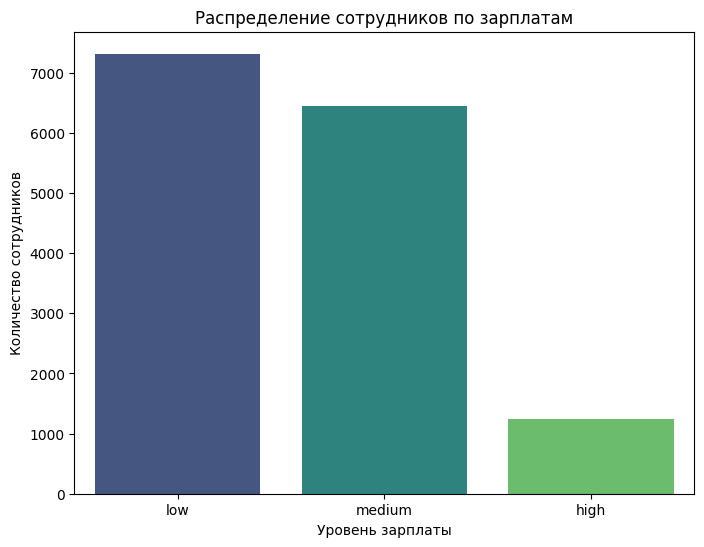

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(x='salary', data=df, palette='viridis')
plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.show()

6 Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

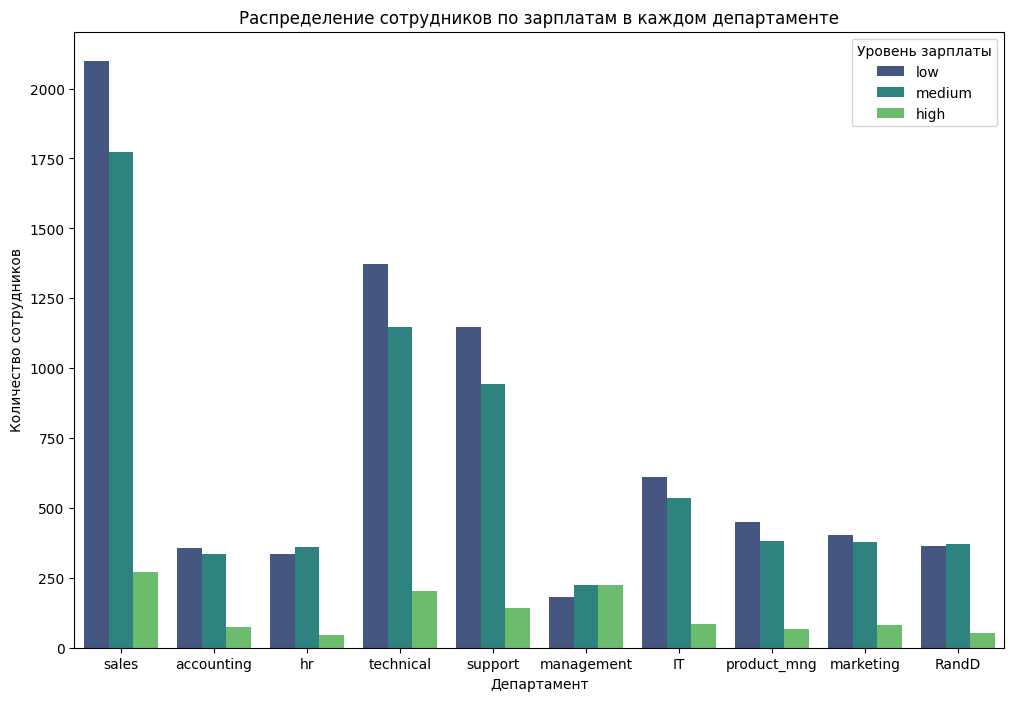

In [45]:
plt.figure(figsize=(12, 8))
sns.countplot(x='department', hue='salary', data=df, palette='viridis')
plt.title('Распределение сотрудников по зарплатам в каждом департаменте')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.legend(title='Уровень зарплаты')
plt.show()

7 Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

In [46]:
# Выделение данных для сотрудников с высоким и низким окладом
high_salary = df[df['salary'] == 'high']['average_montly_hours']
low_salary = df[df['salary'] == 'low']['average_montly_hours']

# Проведение t-теста
t_statistic, p_value = ttest_ind(high_salary, low_salary)

# Вывод результатов
print(f"t-статистика: {t_statistic}")
print(f"p-значение: {p_value}")

# Проверка гипотезы
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: есть статистически значимая разница в среднем времени работы для сотрудников с высоким и низким окладом.")
else:
    print("Не отвергаем нулевую гипотезу: нет статистически значимой разницы в среднем времени работы для сотрудников с высоким и низким окладом.")


t-статистика: -0.7288680398062308
p-значение: 0.4661023478267259
Не отвергаем нулевую гипотезу: нет статистически значимой разницы в среднем времени работы для сотрудников с высоким и низким окладом.


8 Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов

In [47]:
# Рассчет показателей для уволившихся сотрудников
left_employees = df[df['left'] == 1]
promotion_rate_left = left_employees['promotion_last_5years'].mean()
satisfaction_mean_left = left_employees['satisfaction_level'].mean()
projects_mean_left = left_employees['number_project'].mean()

# Рассчет показателей для не уволившихся сотрудников
current_employees = df[df['left'] == 0]
promotion_rate_current = current_employees['promotion_last_5years'].mean()
satisfaction_mean_current = current_employees['satisfaction_level'].mean()
projects_mean_current = current_employees['number_project'].mean()

# Вывод результатов
print("Уволившиеся сотрудники:")
print(f"Доля сотрудников с повышением за последние 5 лет: {promotion_rate_left:.2%}")
print(f"Средняя степень удовлетворенности: {satisfaction_mean_left:.2f}")
print(f"Среднее количество проектов: {projects_mean_left:.2f}\n")

print("Не уволившиеся сотрудники:")
print(f"Доля сотрудников с повышением за последние 5 лет: {promotion_rate_current:.2%}")
print(f"Средняя степень удовлетворенности: {satisfaction_mean_current:.2f}")
print(f"Среднее количество проектов: {projects_mean_current:.2f}")

Уволившиеся сотрудники:
Доля сотрудников с повышением за последние 5 лет: 0.53%
Средняя степень удовлетворенности: 0.44
Среднее количество проектов: 3.86

Не уволившиеся сотрудники:
Доля сотрудников с повышением за последние 5 лет: 2.63%
Средняя степень удовлетворенности: 0.67
Среднее количество проектов: 3.79


9 Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [48]:
# Убираем 'department' и 'salary' из факторов
features = df.drop(['department', 'salary', 'left'], axis=1)

# Отделяем целевую переменную
target = df['left']

# Разделение данных на тестовую и обучающую выборки
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Построение модели LDA
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = lda_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f"Точность модели: {accuracy:.2%}")
print("\nМатрица ошибок:")
print(conf_matrix)
print("\nОтчет о классификации:")
print(classification_rep)

Точность модели: 75.33%

Матрица ошибок:
[[2094  200]
 [ 540  166]]

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2294
           1       0.45      0.24      0.31       706

    accuracy                           0.75      3000
   macro avg       0.62      0.57      0.58      3000
weighted avg       0.71      0.75      0.72      3000

